# CZ1104 Linear Algebra for Computing - Lab 1

## Name: Dion Toh Siyong
## Matriculation Number: U2021674D

## Exercise 1: Computer Security - Simple authentication scheme [1]

In [1]:
import numpy as np
from scipy import linalg
import math
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from itertools import combinations 
import scipy

In [2]:
def str2bits(s): 
    res = ''.join(format(ord(i), 'b') for i in s) 
    bitsArray = []
    for i in res:
        bitsArray.append(int(i))
    return bitsArray

def check_dependency(a,b): 
    for v1 in range(1,3): #1st vector from 1 to 2
        for v2 in range(v1+1,4): 
            for v3 in range(v2+1,5): 
                squareMatrix = np.vstack((a[v1], b[v1], a[v2], b[v2],a[v3], b[v3]))
                determinant = np.linalg.det(squareMatrix) 
                if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
                    return False

    # check if a0,b0 and any two random selected pairs of vectors are linearly independent
    for v1 in range(1,4): #1st vector from 1 to 3
        for v2 in range(v1+1,5):
            squareMatrix = np.vstack((a[0], b[0], a[v1], b[v1], a[v2], b[v2]))
            determinant = np.linalg.det(squareMatrix) 
            if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
                return False
    return True

def bits2str(b):
    NumOfChar = int(len(b)/7)
    string = ''
    for i in range(NumOfChar):
        # 7 digits represents 1 char
        bitsChar = ''.join(str(j) for j in b[7*i:7*i+7]) 
        # convert binary to decimal
        decimalChar = int(bitsChar,2)
        #convert decimal to string
        string = string + chr(decimalChar) 
    return string

# Function to create random binary string of length p
def rand_key(p): 
    
    # Variable to store in an array 
    key = []
  
    # Loop to find the string 
    # of desired length 
    for i in range(p): 
          
        # randint function to generate 
        # 0, 1 randomly and add  
        # the result into arry
        key.append(random.randint(0, 1)) 
    return(key) 


### Question 1:

In [3]:
x = [1, 0, 1, 1, 1]
c1 = [0, 1, 0, 1, 1]
c2 = [1, 1, 1, 1, 0]
b1 = np.dot(c1, x) % 2
b2 = np.dot(c2, x) % 2

print("Harry's response for c1 must be:", b1)
print("Harry's response for c2 must be:", b2)

Harry's response for c1 must be: 0
Harry's response for c2 must be: 1


### Question 2:

In [4]:
print("Eve's response should be b1 + b2 =", (b1+b2)%2)   

#to check:
c = [1, 0, 1, 0, 1]
print("Verification:", (np.dot(c, x))%2)

Eve's response should be b1 + b2 = 1
Verification: 1


### Question 3:

In [5]:
def vector(str):
    a = []
    for i in str:
        a.append(int(i))   
    return a

In [6]:
ca = "011001"
cb = "110111"
Ch = [[vector("110011"), 0], [vector("101010"), 0], [vector("111011"), 1], [vector("001100"), 1]]

def response(Ch, c):
    for i in range(len(Ch)):
        for j in range(len(Ch)):
            target = vector(c)
            result = [((a+b)%2) for a, b in zip(vector(Ch[i][0]), vector(Ch[j][0]))]
            #print(target)
            #print(result)
            comparison = target == result
            #print(comparison)
            if comparison:
                return (Ch[i][1] + Ch[j][1]) % 2

In [7]:
print("The response to ca should be: ", response(Ch, ca))
print("The response to cb should be: ", response(Ch, cb))

The response to ca should be:  0
The response to cb should be:  0


### Question 4:

In [8]:
from scipy import linalg

C matrix must be a square matrix and det(C) != 0

In [9]:
Ch.append([vector("011011"), 0])
Ch.append([vector("110100"), 1])

C = []
b = []
for i in Ch:
    C.append(i[0])
    b.append(i[1])

x = (linalg.solve(C, b) %2)
print("The password x is:", x)

The password x is: [1. 0. 1. 0. 0. 1.]


## Exercise 2: Machine learning – Linear regression

### Question 5:

A = 𝑥1 (area in 1000 sq ft)

b = y (price in 1000 dollars)

In [10]:
house = {}
house["1"] = [0.846, 115.00]
house["2"] = [1.324, 234.50]
house["3"] = [1.150, 198.00]
house["4"] = [3.037, 528.00]
house["5"] = [3.984, 572.50]

x_2 = 0
x_1 = 0
xy = 0
y = 0
n = 5

for i in range(1, 6):
    x_2 += (house[str(i)][0]) ** 2
    x_1 += (house[str(i)][0])
    xy += (house[str(i)][0]) * (house[str(i)][1])
    y += (house[str(i)][1])

A = [[x_2, x_1],
      [x_1, n]]

b = [[xy],
     [y]]

result = linalg.inv(A)@b

m = result[0]
c = result[1]

print("The value of m is", m)
print("The value of c is", c)

The value of m is [148.20206538]
The value of c is [23.08848838]


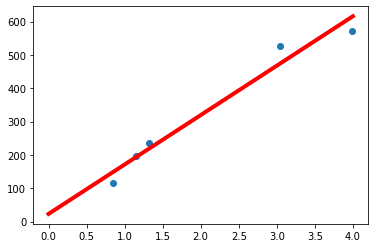

In [11]:
x1 = [0.846, 1.324, 1.150, 3.037, 3.984]
y1 = [115.00, 234.50, 198.00, 528.00, 572.50]

import matplotlib.pyplot as plt
xs = np.linspace(0,4,5)
ys = c + m*xs
plt.plot(xs,ys,'r',linewidth=4) 
plt.scatter(x1,y1);
plt.show()

### Question 6:

In [12]:
x2 = [1, 2, 3, 4, 5]
X = []
for i in range(len(x1)):
    X.append([1, x1[i], x2[i]])

In [13]:
X_T_X = np.transpose(X)@X
X_T_y = np.transpose(X)@y1
a = scipy.linalg.solve(X_T_X, X_T_y)
print("Vector a is:", a)

Vector a is: [  9.97566234 130.67172705  16.45635726]


In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

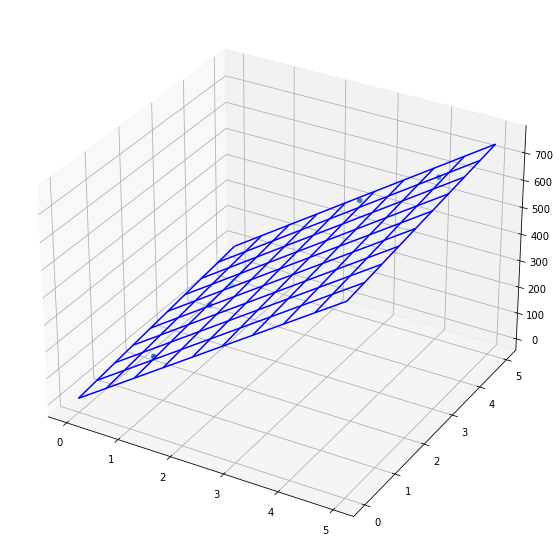

In [15]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel = ("x1")
ax.set_ylabel = ("x2")
ax.set_zlabel = ("y1")

xR = np.linspace(0, 5, 10)
yR = np.linspace(0, 5, 10)
xx, yy = np.meshgrid(xR, yR)
zz = a[0] + a[1] * xx + a[2] * yy
ax.scatter3D(x1, x2, y1)
ax.plot_wireframe(xx, yy, zz, color = 'blue')
plt.show()

## Exercise 3: Cryptography – Threshold secret sharing [1]

### Question 7:

In [16]:
from random import randint

a = [1, 1, 0, 1, 0, 1]
b = [1, 1, 0, 0, 1, 1]

def random_vector(s, t):
    u = rand_key(6)
    while (np.dot(u, a) != s or np.dot(u, b) != t):
        u = rand_key(6)
    return u

In [17]:
def generate_ab():
    while True:
        a_list = [a]
        b_list = [b]
        for i in range(4):
            a_list.append(rand_key(6))
            b_list.append(rand_key(6)) 
        if check_dependency(a_list, b_list) == False:
            continue
        else:
            a_l, b_l = a_list[1:], b_list[1:]
            return[np.vstack(a_l), np.vstack(b_l)]
            break
ab = generate_ab()
al, bl = ab[0], ab[1]

print(al)
print(bl)

[[1 1 1 0 0 1]
 [1 1 0 1 1 1]
 [1 0 0 1 0 0]
 [0 1 0 1 0 0]]
[[1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [0 1 0 1 1 0]
 [0 1 1 0 1 1]]


In [18]:
password = str2bits("Potter")

passmat = np.vstack(np.array_split(password, len(password)/2))

In [19]:
secret = []
for i in passmat:
    secret.append(random_vector(i[0], i[1]))

In [20]:
def secret_bit(a, b, u):
    beta = [i%2 for i in np.dot(a, u)]
    gamma = [j%2 for j in np.dot(b, u)]
    return [beta, gamma]

ab = generate_ab()
a, b = ab[0], ab[1]
beta_gamma = secret_bit(a, b, secret[-1])
beta_i, gamma_i = beta_gamma[0], beta_gamma[1]
print(f"𝛽_i = {beta_i}")
print(f"𝛾_i = {gamma_i}")

𝛽_i = [0, 1, 0, 1]
𝛾_i = [0, 1, 0, 1]


In [21]:
# Function to generate all the 4 combinations
def comb(a, b, beta, gamma):
    # Generates a list of combinations
    arr = [0, 1, 2, 3] 
    # x = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
    x = list(combinations(arr, 3))
    combination = []
    for i in range(4):
        n = x[i]
        combi = []
        secret =  []
        for j in range(3):
            combi.append(a[n[j]])
            combi.append(b[n[j]])
            secret.append(beta[n[j]])
            secret.append(gamma[n[j]])
        combination.append([combi, secret])
    return combination

c = comb(a, b, beta_i, gamma_i)
u_j = []
for j in range(4):
    u_j.append([int(n) for n in linalg.solve(c[j][0], c[j][1])])

In [22]:
a = [1, 1, 0, 1, 0, 1]
b = [1, 1, 0, 0, 1, 1]
s_i = np.dot(secret, a)
t_i = np.dot(secret, b)

s_j = np.dot(u_j, a)
t_j = np.dot(u_j, b)
p_raw = []
for i in range(len(s_i)):
    p_raw.append(s_i[i])
    p_raw.append(t_i[i])

# Return check if the resultant bits in p_raw equates to the string
print(f"raw password bits = {p_raw}")
print()
print(bits2str(p_raw))

raw password bits = [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]

Potter
